<a href="https://colab.research.google.com/github/apoorvaec1030/NLP-problems/blob/main/notebooks/Gemini_and_Vertex_Generate_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Gemini and Vertex can generate images for online sales</b>

Gemini, Google's latest and most advanced model, can help you create beautiful images with Vertex's image generation API. Use this notebook to generate images you can use for online marketing.

<b>[Required] Set up a Google Cloud account</b>

Okay so we get it, this part is hard, but in order to use the Cloud speech-to-text API you need to set up a Cloud account, project, and billing. Start [here](https://console.cloud.google.com/getting-started).

Once you've done that, come back here.

In [4]:
#@title Authenticate with Google Cloud and your project ID

import vertexai
from vertexai.preview.vision_models import Image, ImageGenerationModel

from google.colab import auth

gcp_project_id = 'GCP_PROJECT_ID' # @param {type: "string"}

auth.authenticate_user(project_id=gcp_project_id)

vertexai.init(project=gcp_project_id)

In [3]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

In [5]:
#@title Use Gemini to generate an image prompt for your item

item_selling = 'indian clothes' #@param {type: "string"}

model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

prompttext = f"""
  I'm selling {item_selling} online, and I need to generate an image of it.
  I need the image to be compelling and interesting to convince people to buy.
  Can you create a prompt I can use to generate an image of {item_selling} with Vertex?
  Respond with only the prompt, no other text. Be as verbose as possible.
  """

response = chat.send_message(prompttext)

response.text

"Create an artistic and compelling image showcasing the intricate beauty and vibrant colors of Indian attire. Feature a full-length shot of a model draped in a flowing traditional ensemble, such as a saree or salwar kameez. Capture the model's graceful姿態 and showcase the intricate embroidery, delicate fabrics, and ornamentation that define Indian clothing. Use a rich color palette and stunning lighting to highlight the vibrant hues and textures of the garments. Ensure the image is visually captivating and evokes a sense of cultural pride and elegance."

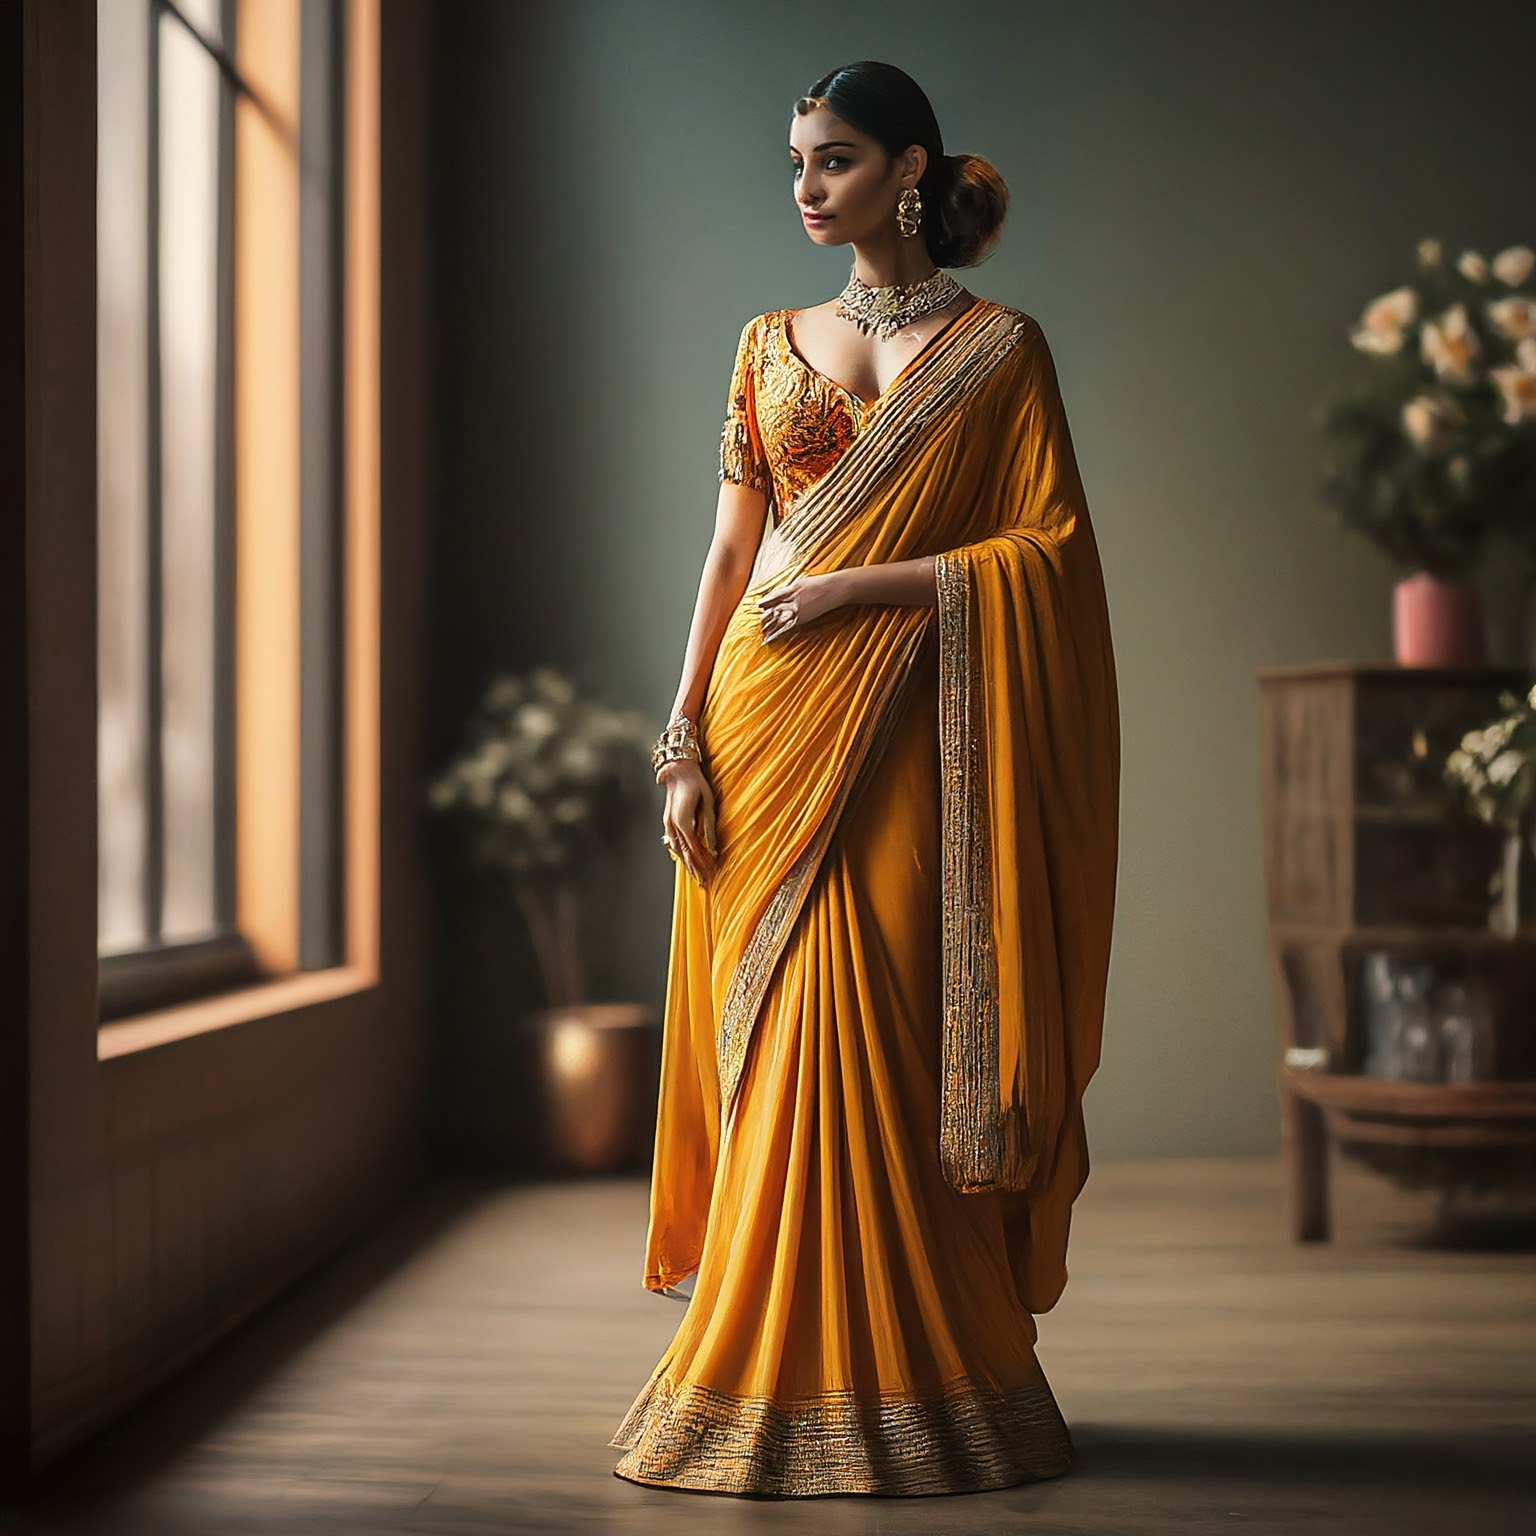

In [7]:
#@title Use Vertex to generate an image

from IPython.display import Image

model = ImageGenerationModel.from_pretrained("imagegeneration@005")
images = model.generate_images(prompt=response.text)

images[0].save(location="./gen-img1.png", include_generation_parameters=True)

Image('./gen-img1.png', height=500)